# Delhi Air Pollution


### Air pollution refers to the release of pollutants into the air that are detrimental to human health and the planet as a whole. It can be described as one of the most dangerous threats that the humanity ever faced.

## About notebook

This notebook data is extracted from Dataset assesible exclusively only in Kaggle. The BigQurey Helper Object will convert data in cloud storage into Pandas DataFrame object. The query syntax is same as SQL. As size of data is very high convert entire data to DataFrame is cumbersome. So query is written such that will be readly available for Visualization.

### Importing the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pandas_profiling

In [2]:
pip install pandas_profiling

Note: you may need to restart the kernel to use updated packages.


### Starting with datasets

In [4]:
df=pd.read_csv('delhi_air_pollution.csv')
df.head()

id      site       date       month  year   PM2.5    PM10    SO2    CO  \
0   1  site_301          1           1  2016  360.81  750.91  33.15  3.13   
1   2  site_301          3           1  2016  341.32  651.71  22.83  2.57   
2   3  site_301          5           1  2016  433.35  847.84  38.65  3.58   
3   4  site_301          7           1  2016  468.02  743.11  34.02  3.39   
4   5  site_301          9           1  2016  169.49  480.58  16.10  2.20   

   Ozone  
0  14.74  
1  15.67  
2  32.07  
3  27.80  
4  14.09

### Profile Report

In [5]:
df.profile_report()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [6]:
df.value_counts()

id    site            date        month  year  PM2.5   PM10    SO2    CO    Ozone
1     site_301  1           1            2016  360.81  750.91  33.15  3.13  14.74    1
3150  site_106  12          5            2018  115.80  259.62  11.05  0.58  58.86    1
3174  site_106  29          6            2018  28.44   72.80   8.10   1.47  25.55    1
3175  site_106  1           7            2018  24.51   74.51   9.04   1.43  26.73    1
3176  site_106  3           7            2018  35.23   111.83  7.56   1.36  35.00    1
                                                                                    ..
1540  site_118  20          6            2019  39.44   131.34  5.38   0.50  92.28    1
1541  site_118  22          6            2019  76.40   174.16  5.49   0.44  90.00    1
1542  site_118  24          6            2019  27.40   85.01   3.60   0.36  50.26    1
1543  site_118  26          6            2019  65.87   154.82  19.32  0.53  46.89    1
4530  site_105  18          1            2021  2

The Above code value_counts() function return a Series containing counts of unique values in the dataset

In [7]:
df.dtypes

id               int64
site            object
      date      object
      month     object
year             int64
PM2.5          float64
PM10           float64
SO2            float64
CO             float64
Ozone          float64
dtype: object

The above dataset is giving the type of data in the dataset

In [8]:
df['id'].unique()

array([   1,    2,    3, ..., 4528, 4529, 4530], dtype=int64)

### Plotting graph

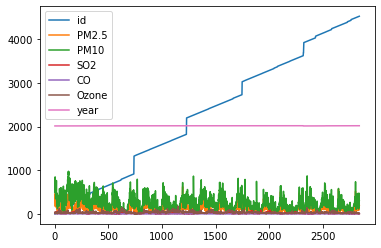

In [9]:
df=pd.read_csv('air_pollution_delhi.csv')
df

df.plot()
plt.show()

## Years producing more pollution

#### A PivotTable is an interactive way to quickly summarize large amounts of data.

In [10]:
df.pivot_table(values='PM2.5', index='site', columns='year').head()

year             2016        2017        2018        2019        2020  \
site                                                                    
site_105    98.762500  147.075574  117.002270  111.317987   93.567308   
site_106          NaN  129.548333   82.091676   97.050185   83.915318   
site_118          NaN         NaN  108.681563  122.914171  110.561732   
site_1422         NaN         NaN  106.381914  112.202079  104.572000   
site_301   163.821918  181.654135  159.952416  128.441813  114.032750   

year             2021  
site                   
site_105   183.416667  
site_106   172.734444  
site_118   207.272222  
site_1422  220.896667  
site_301   257.135000

In [11]:
df.describe()

id       PM2.5         PM10          SO2           CO  \
count  2844.000000  2844.00000  2844.000000  2844.000000  2844.000000   
mean   2294.459916   117.86320   254.895988    15.395668     1.648991   
std    1373.536602    95.21411   159.296887    10.522195     1.237897   
min       1.000000     1.26000     6.340000     0.410000     0.000000   
25%     888.750000    47.90750   131.155000     7.907500     0.820000   
50%    2392.500000    89.19500   221.885000    12.825000     1.430000   
75%    3435.250000   158.90000   342.455000    20.760000     2.170000   
max    4530.000000   629.58000   974.920000    87.540000    16.840000   

             Ozone         year  
count  2844.000000  2844.000000  
mean     34.312602  2018.748594  
std      20.450452     1.158134  
min       2.320000  2016.000000  
25%      20.775000  2018.000000  
50%      29.265000  2019.000000  
75%      43.035000  2020.000000  
max     176.470000  2021.000000

In [12]:
df['year'].value_counts()

2019    840
2020    838
2018    753
2017    219
2016    150
2021     44
Name: year, dtype: int64

#### Digging deeper

<AxesSubplot:xlabel='year'>

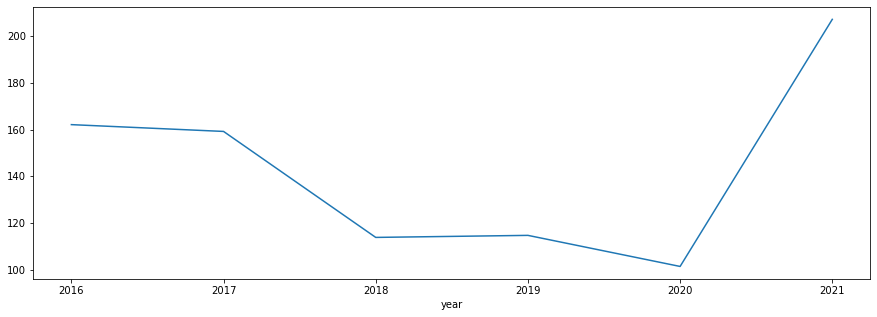

In [13]:
fig,axes=plt.subplots(figsize=(15,5))
df.groupby('year')['PM2.5'].mean().plot()

<AxesSubplot:xlabel='year', ylabel='PM2.5'>

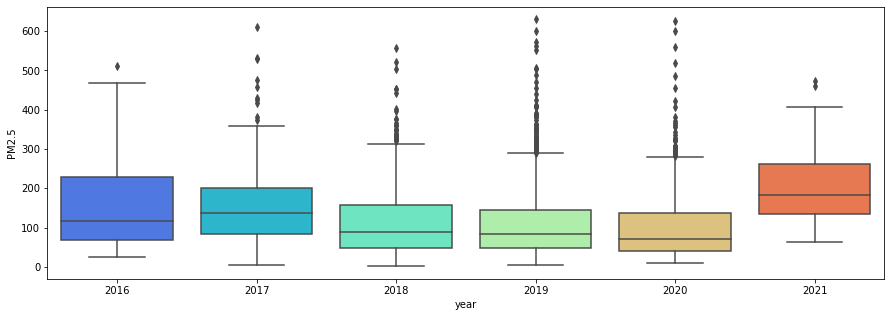

In [14]:
fig,axes=plt.subplots(figsize=(15,5))
sns.boxplot(x="year", y="PM2.5", data=df, palette='rainbow')

<AxesSubplot:xlabel='year', ylabel='PM2.5'>

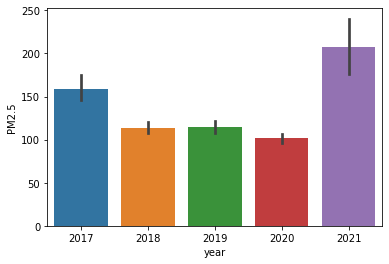

In [15]:
df2017=df[df['year']>=2017]
sns.barplot(x='year', y='PM2.5', data=df2017)

<AxesSubplot:xlabel='year', ylabel='site'>

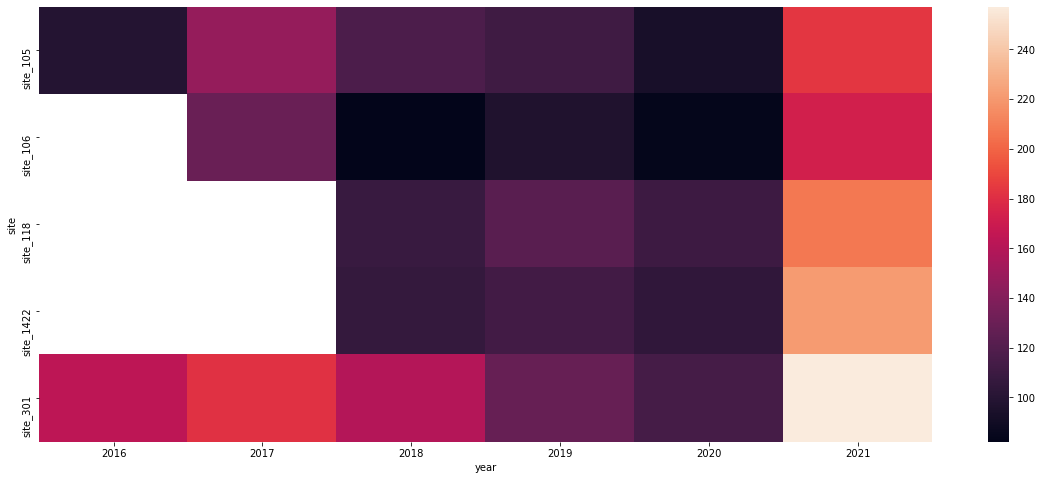

In [16]:
fig,axes=plt.subplots(figsize=(20,8))
da=df.pivot_table(values='PM2.5', index='site', columns='year')
sns.heatmap(da,ax=axes)

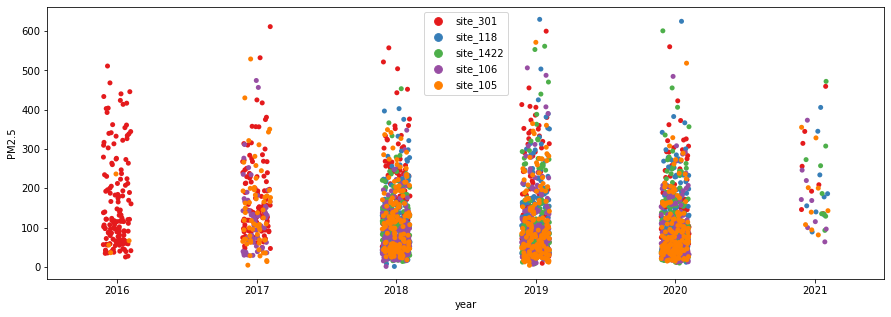

In [17]:
fig,axes=plt.subplots(figsize=(15,5))
sns.stripplot(x="year", y="PM2.5", data=df, jitter=True, hue='site', palette='Set1')
plt.legend(loc='upper center')

<AxesSubplot:xlabel='PM2.5', ylabel='Density'>

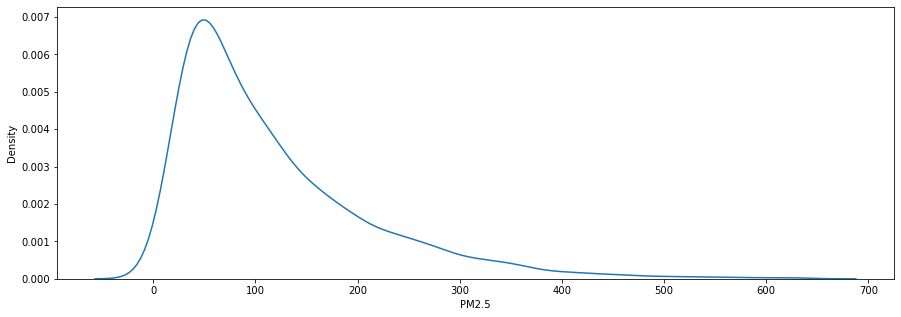

In [18]:
fig,axes=plt.subplots(figsize=(15,5))
sns.kdeplot(df['PM2.5'])

<AxesSubplot:xlabel='year', ylabel='PM2.5'>

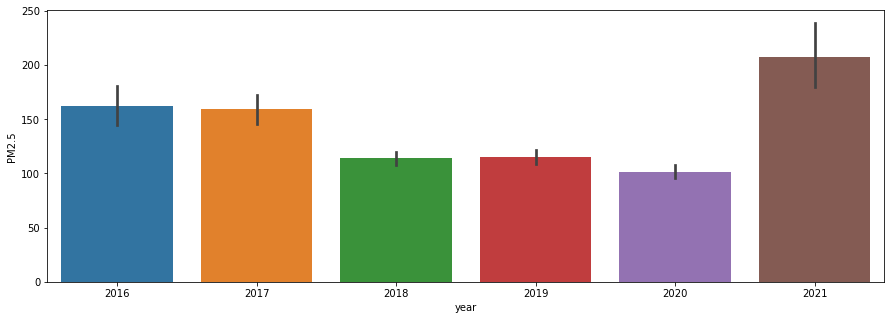

In [19]:
# fig,axes=plt.subplots(figsize=(15,5))
plt.figure(figsize=(15,5))
sns.barplot(x='year', y='PM2.5', data=df)

<AxesSubplot:xlabel='year', ylabel='PM2.5'>

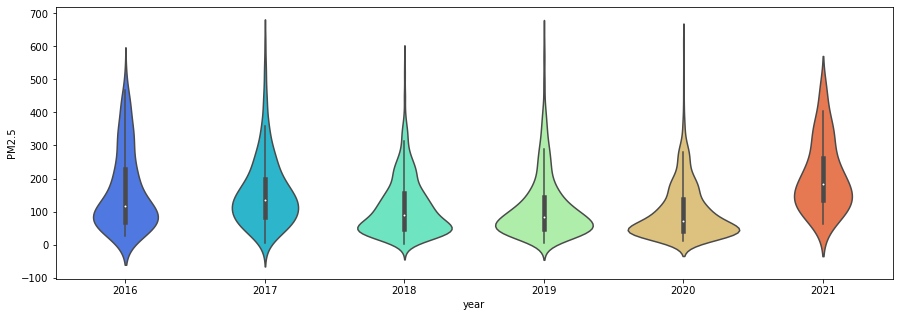

In [20]:
fig,axes=plt.subplots(figsize=(15,5))
sns.violinplot(x="year", y="PM2.5", data=df, palette='rainbow')

## Conclusion

The regulation  of  air  pollutant  levels  is  rapidly 
becoming one of  the  most  important  tasks.  It  is 
important that  people  know  what  the  level  of 
pollution in  their  surroundings  is  and  takes  a  step 
towards fighting against it.  

The results  show  that  machine  learning  models 
(logistic regression and  autoregression)  can  be 
efficiently used to detect the quality of air and predict 
the level of PM2.5 in the future.  

The  proposed  system  will  help  common  people as 
well  as  those  in  the  meteorological  department  to 
detect  and  predict  pollution  levels  and  take  the 
necessary action  in accordance  with that.  Also, this 
will help  people  establish  a  data  source  for  small 
localities which are usually left out in comparison to 
the large cities.